In [1]:
import os
import PIL
import cv2
import tarfile
import numpy as np
import pydicom
import pandas as pd
from glob import glob
import nibabel as nib
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

# Data:
# Download from kaggle: https://www.kaggle.com/dschettler8845/brats-2021-task1
# Extract into the same directory as this file, leave name as "archive"

# References:
# Reading data: https://www.kaggle.com/dschettler8845/load-task-1-dataset-comparison-w-task-2-dataset/notebook

# Notes:
# participants can exclude the cases during training: [00109, 00123, 00709].

In [2]:
# Create Data Directory (will be created one parent file up from this file's home)
if not os.path.isdir("../project_data"):
    os.makedirs("../project_data", exist_ok=True)
    
# Load Competition Training Dataframe
train_df = pd.read_csv("./train_labels.csv")

# Extract Update
print("\n... Extracting BraTSID=00495 Task1 Update Files ...")
tar = tarfile.open("./archive/BraTS2021_00495.tar")
tar.extractall("../project_data")
tar.close()

# Extract Update
print("... Extracting BraTSID=00621 Task1 Update Files ...")
tar = tarfile.open("./archive/BraTS2021_00621.tar")
tar.extractall("../project_data")
tar.close()

# Extract Main Training Data
print("... Extracting Main Task1 Training Files (3-5 Minutes) ...\n")
tar = tarfile.open("./archive/BraTS2021_Training_Data.tar")
tar.extractall("../project_data")
tar.close()


... Extracting BraTSID=00495 Task1 Update Files ...
... Extracting BraTSID=00621 Task1 Update Files ...
... Extracting Main Task1 Training Files (3-5 Minutes) ...






... IMAGE ID=00376 **MGMT=0** ...       [SHOWING SLICE/SCAN 83] 


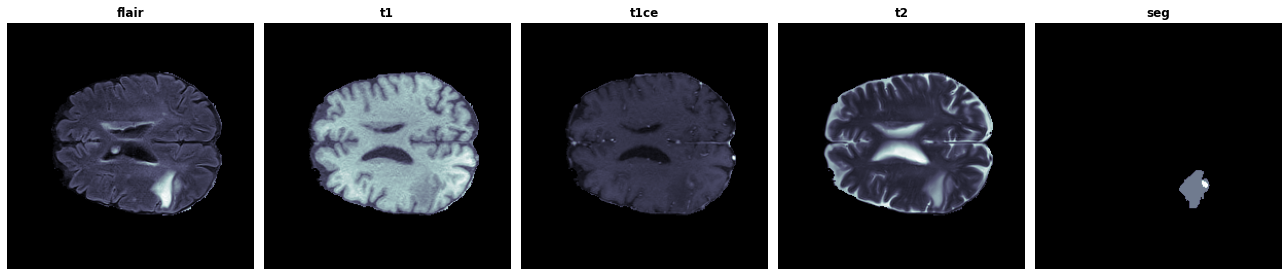




... IMAGE ID=00789 **MGMT=1** ...       [SHOWING SLICE/SCAN 83] 


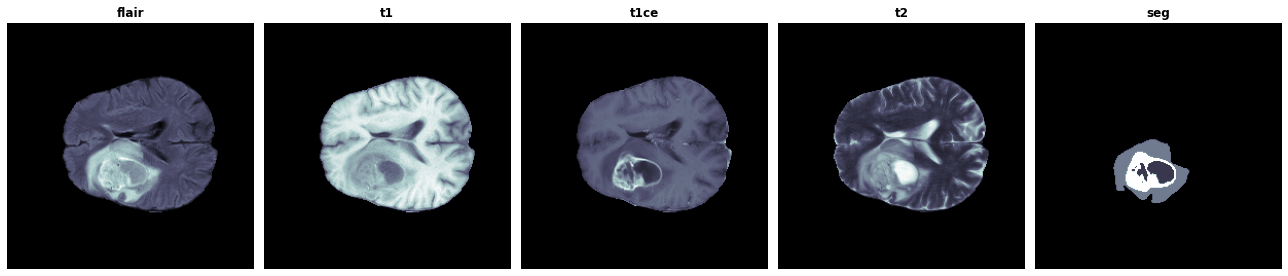




... IMAGE ID=00441 **MGMT=0** ...       [SHOWING SLICE/SCAN 83] 


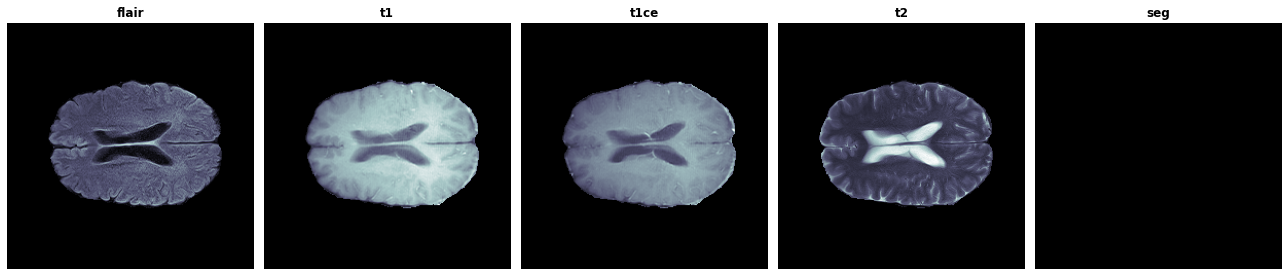




... IMAGE ID=00703 **MGMT=0** ...       [SHOWING SLICE/SCAN 83] 


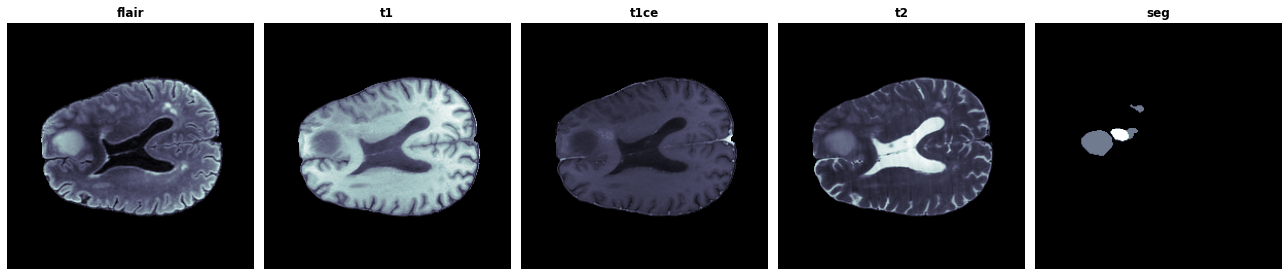




... IMAGE ID=00807 **MGMT=1** ...       [SHOWING SLICE/SCAN 83] 


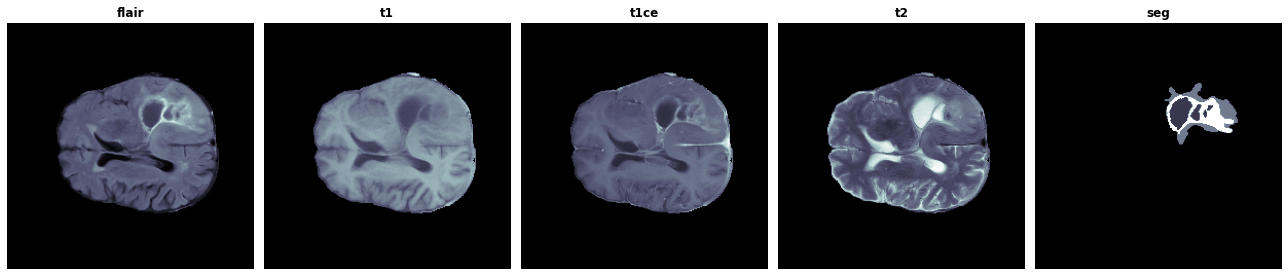




... IMAGE ID=00523 **MGMT=1** ...       [SHOWING SLICE/SCAN 83] 


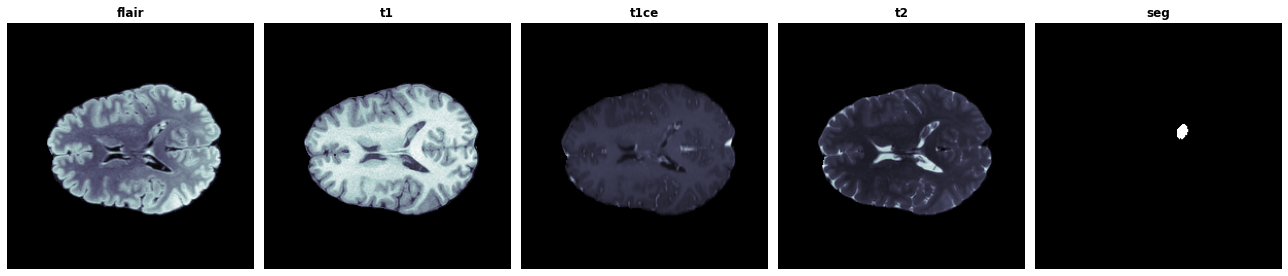




... IMAGE ID=00241 **MGMT=0** ...       [SHOWING SLICE/SCAN 83] 


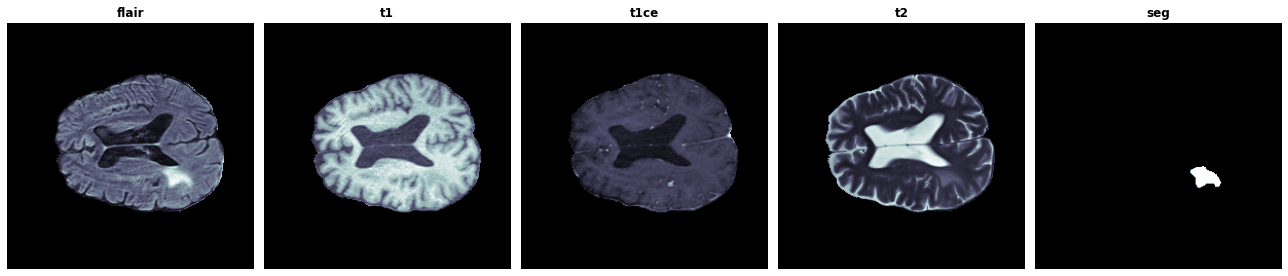




... IMAGE ID=00778 **MGMT=0** ...       [SHOWING SLICE/SCAN 83] 


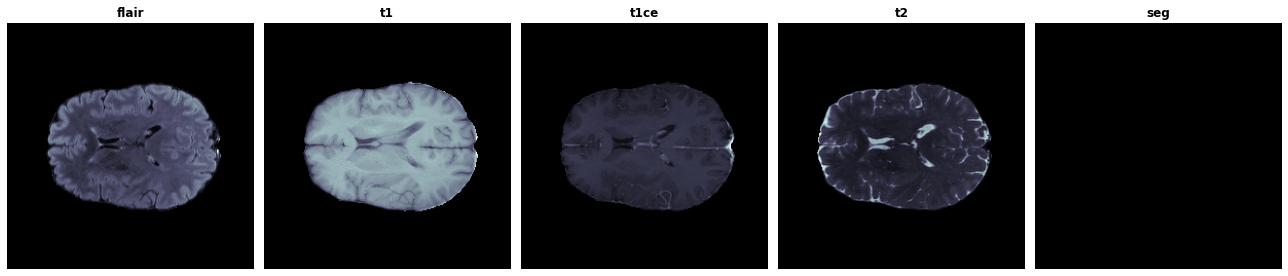




... IMAGE ID=01010 **MGMT=0** ...       [SHOWING SLICE/SCAN 83] 


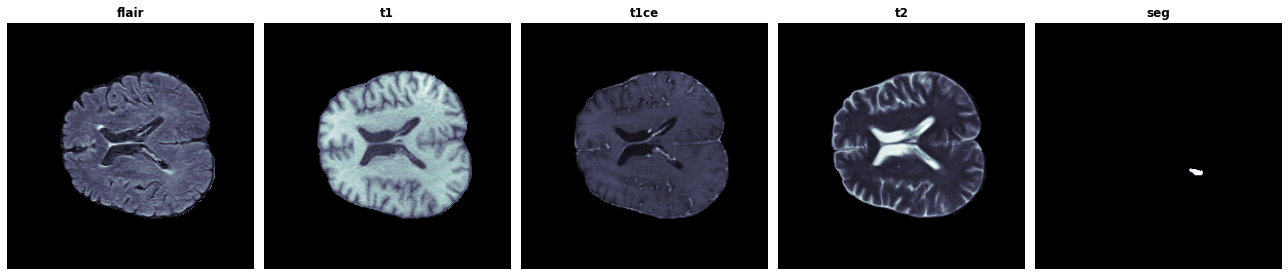

In [4]:
img_ids = ["00376", "00789", "00441", "00703", "00807", "00523", "00241", "00778", "01010",]
SCAN_NUM = 83

for img_id in img_ids:
    print(f"\n\n\n... IMAGE ID={img_id} **MGMT={train_df[train_df['BraTS21ID']==int(img_id)].MGMT_value.values[0]}** ...       [SHOWING SLICE/SCAN {SCAN_NUM}] ")
    plt.figure(figsize=(18, 5))

    for i, nii in enumerate([f'../project_data/BraTS2021_{img_id}/BraTS2021_{img_id}_{s_type}.nii.gz' for s_type in ["flair", "t1", "t1ce", "t2", "seg"]]):
        # PLOTTING
        plt.subplot(1,5,i+1)
        image = nib.load(nii).get_fdata()
        plt.title(nii.rsplit("_", 1)[1].split(".", 1)[0], fontweight="bold")
        plt.axis(False)
        plt.imshow(image[:, :, SCAN_NUM], cmap="bone")
        
    plt.tight_layout()    
    plt.show()